In [1]:
from utils import *
from logic import *
from notebook import psource

## Who Resigns ?
Aim : To create a `FolKB` based on the following paragraph.<br><br>
<em>Boris Johnson is the prime minister of UK. Sanna Marin is the prime minister of Finland. Videos of parties at the Downing Street attended by Boris Johnson were publicly leaked. Videos of private
parties attended by Sanna Miran were publicly leaked. The Downing Street parties violated Covid-19
lockdown laws. Social gatherings violating Covid-19 lockdown laws are illegal. The prime minister of
a country who attends illegal parties is disapproved by the citizens of that country. The prime
minister of a country who is disapproved by its citizens loses their trust. The prime minister of a
country resigns from the prime minister post after losing its citizens' trust.</em>
<br><br>
We'll store the clauses in list aptly named `clauses`.

In [2]:
clauses = []

<em>“Boris Johnson is the prime minister of UK.”</em>

$\text{Primeminister}(BorisJohnson, UK)$

In [3]:
clauses.append(expr("Primeminister(BorisJohnson, UK)"))

<em>“Sanna Marin is the prime minister of Finland.”</em>

$\text{Primeminister}(SannaMarin, Finland)$

In [4]:
clauses.append(expr("Primeminister(SannaMarin, Finland)"))

<em>“Videos of parties at the Downing Street attended by Boris Johnson were publicly leaked.”</em>

$\text{Leaked}(DowningStreetParty, BorisJohnson)$

In [5]:
clauses.append(expr("Leaked(DowningStreetParty, BorisJohnson)"))

<em>“Videos of private parties attended by Sanna Miran were publicly leaked. ”</em>

$\text{Leaked}(PrivateParty, SannaMarin)$

In [6]:
clauses.append(expr("Leaked(PrivateParty, SannaMarin)"))

<em>“The Downing Street parties violated Covid-19 lockdown laws.”</em>

$\text{Violated}(DowningStreetParty, Covid19)$

In [7]:
clauses.append(expr("Violated(DowningStreetParty, Covid19)"))

<em>“Social gatherings violating Covid-19 lockdown laws are illegal. ”</em>

$\text{Violated}(x, Covid19) \implies \text{Illegal}(x)$

In [8]:
clauses.append(expr("Violated(x, Covid19) ==> Illegal(x)"))

<em>“The prime minister of a country who attends illegal parties is disapproved by the citizens of that country.”</em>

$\text{Primeminister}(x, y) \land \text{Leaked}(z, x) \land \text{Illegal}(z) \implies \text{Disapproved}(Citizens, y)$

In [9]:
clauses.append(expr("Primeminister(x, y) & Leaked(z, x) & Illegal(z) ==> Disapproved(Citizens, y)"))

<em>“The prime minister of a country who is disapproved by its citizens loses their trust. ”</em>

$\text{Primeminister}(x, y) \land \text{Disapproved}(Citizens, y) \implies \text{Trust}(x, Lost)$

In [10]:
clauses.append(expr("Primeminister(x, y) & Disapproved(Citizens, y) ==> Trust(x, Lost)"))

<em>“The prime minister of a country resigns from the prime minister post after losing its citizens' trust.”</em>

$\text{Primeminister}(x, y) \land \text{Trust}(x, Lost) \implies \text{Resigns}(x, y)$

In [14]:
clauses.append(expr("Primeminister(x, y) & Trust(x, Lost) ==> Resigns(x, y)"))

In [12]:
clauses

[Primeminister(BorisJohnson, UK),
 Primeminister(SannaMarin, Finland),
 Leaked(DowningStreetParty, BorisJohnson),
 Leaked(PrivateParty, SannaMarin),
 Violated(DowningStreetParty, Covid19),
 (Violated(x, Covid19) ==> Illegal(x)),
 (((Primeminister(x, y) & Leaked(z, x)) & Illegal(z)) ==> Disapproved(Citizens, y)),
 ((Primeminister(x, y) & Disapproved(Citizens, y)) ==> Trust(x, Lost)),
 ((Primeminister(x, y) & Trust(x, Lost)) ==> Resigns(x, y))]

In [13]:
crime_kb = FolKB(clauses)

answer = fol_fc_ask(crime_kb, expr('Resigns(x, y)'))
print(list(answer))

[{x: BorisJohnson, y: UK}]


## Proof Tree

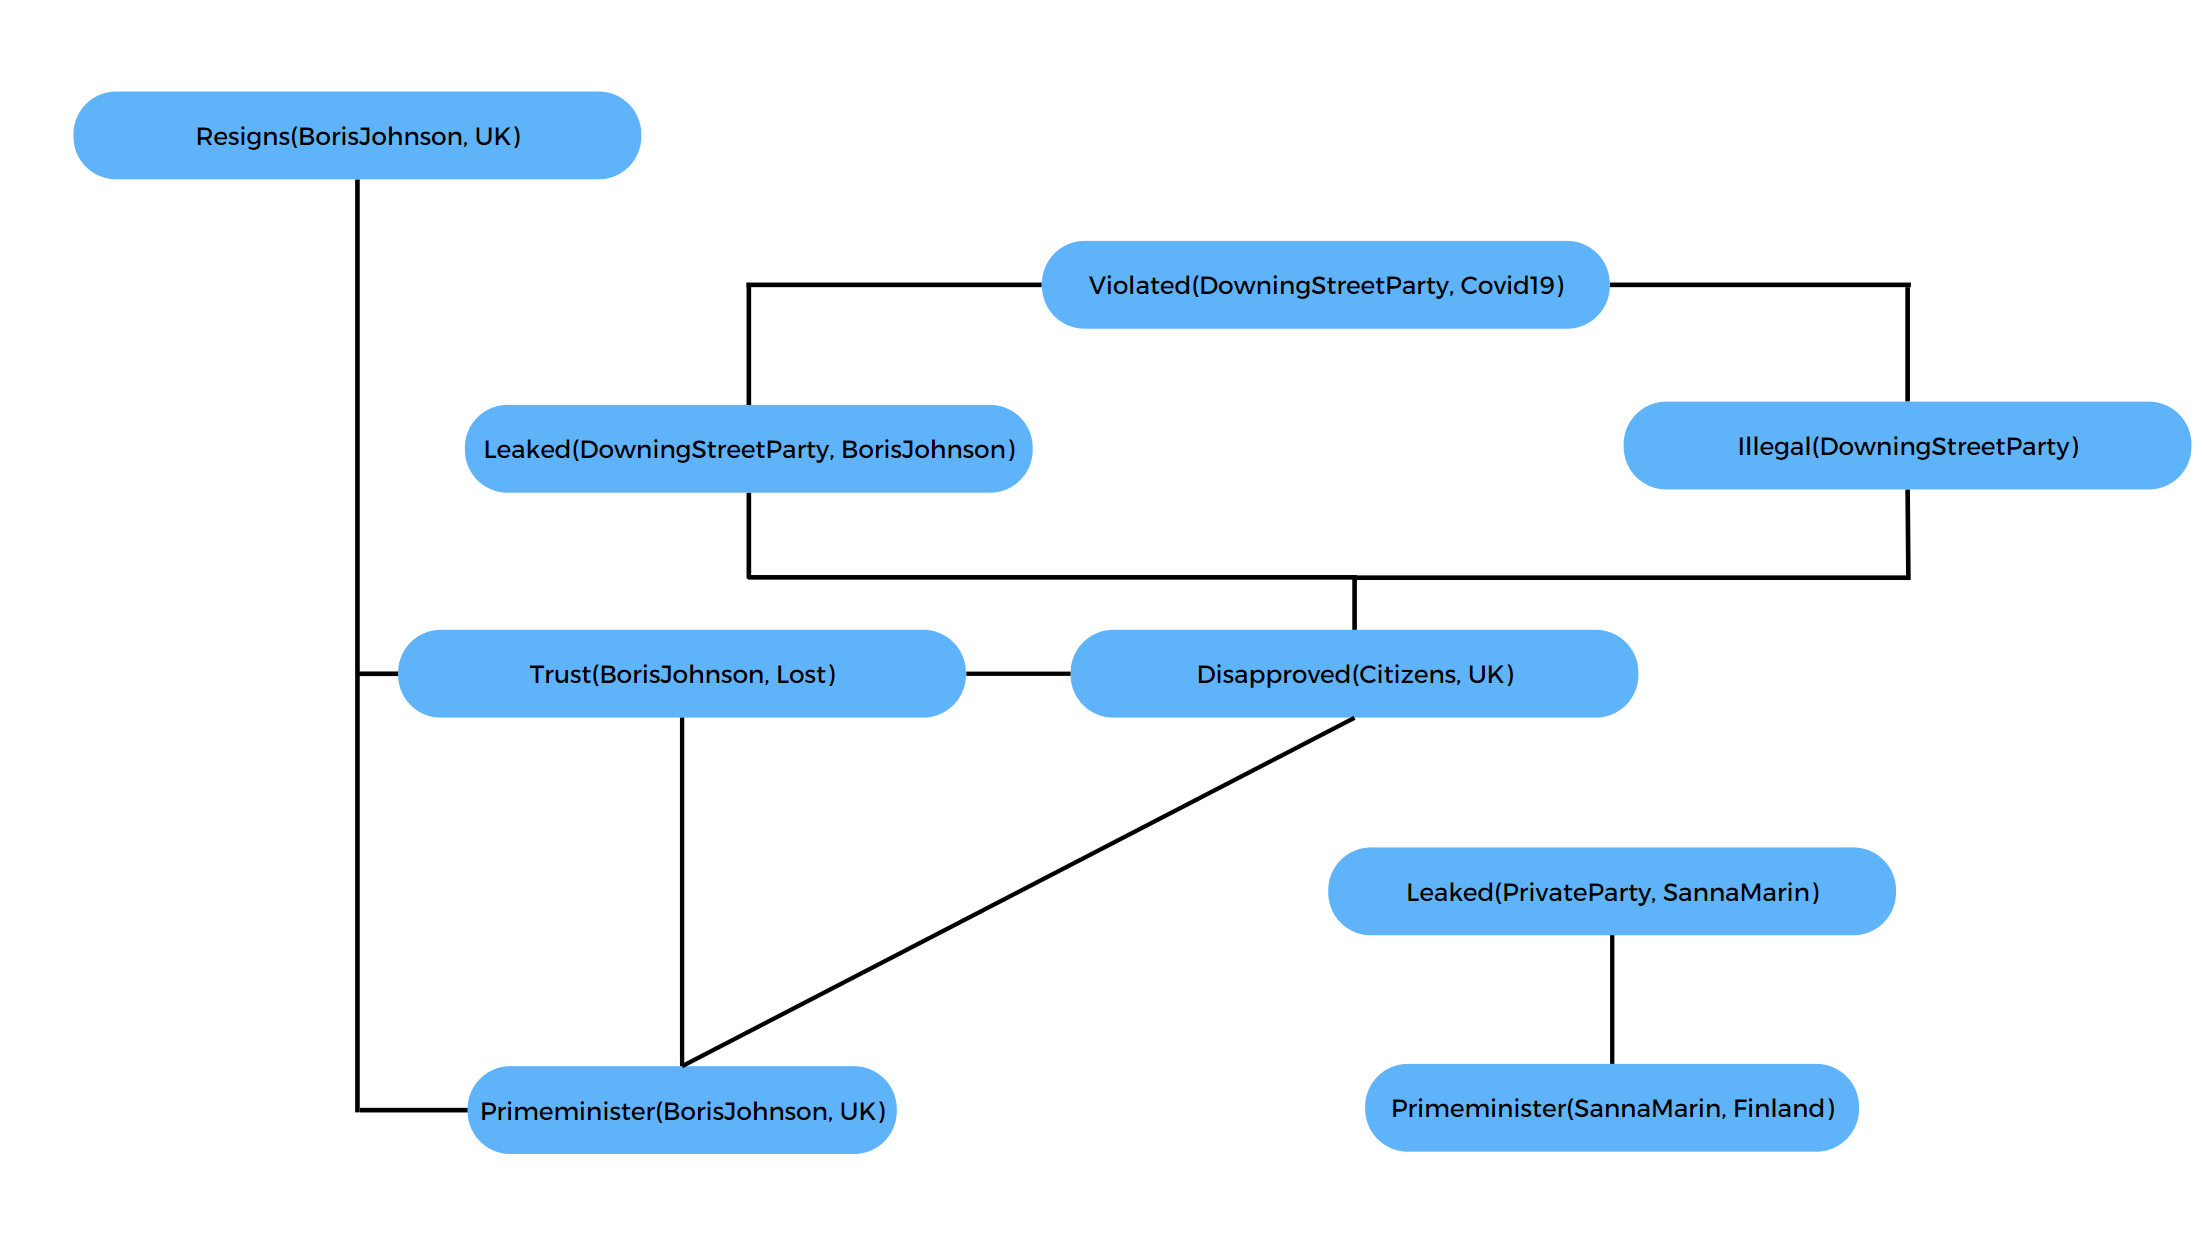

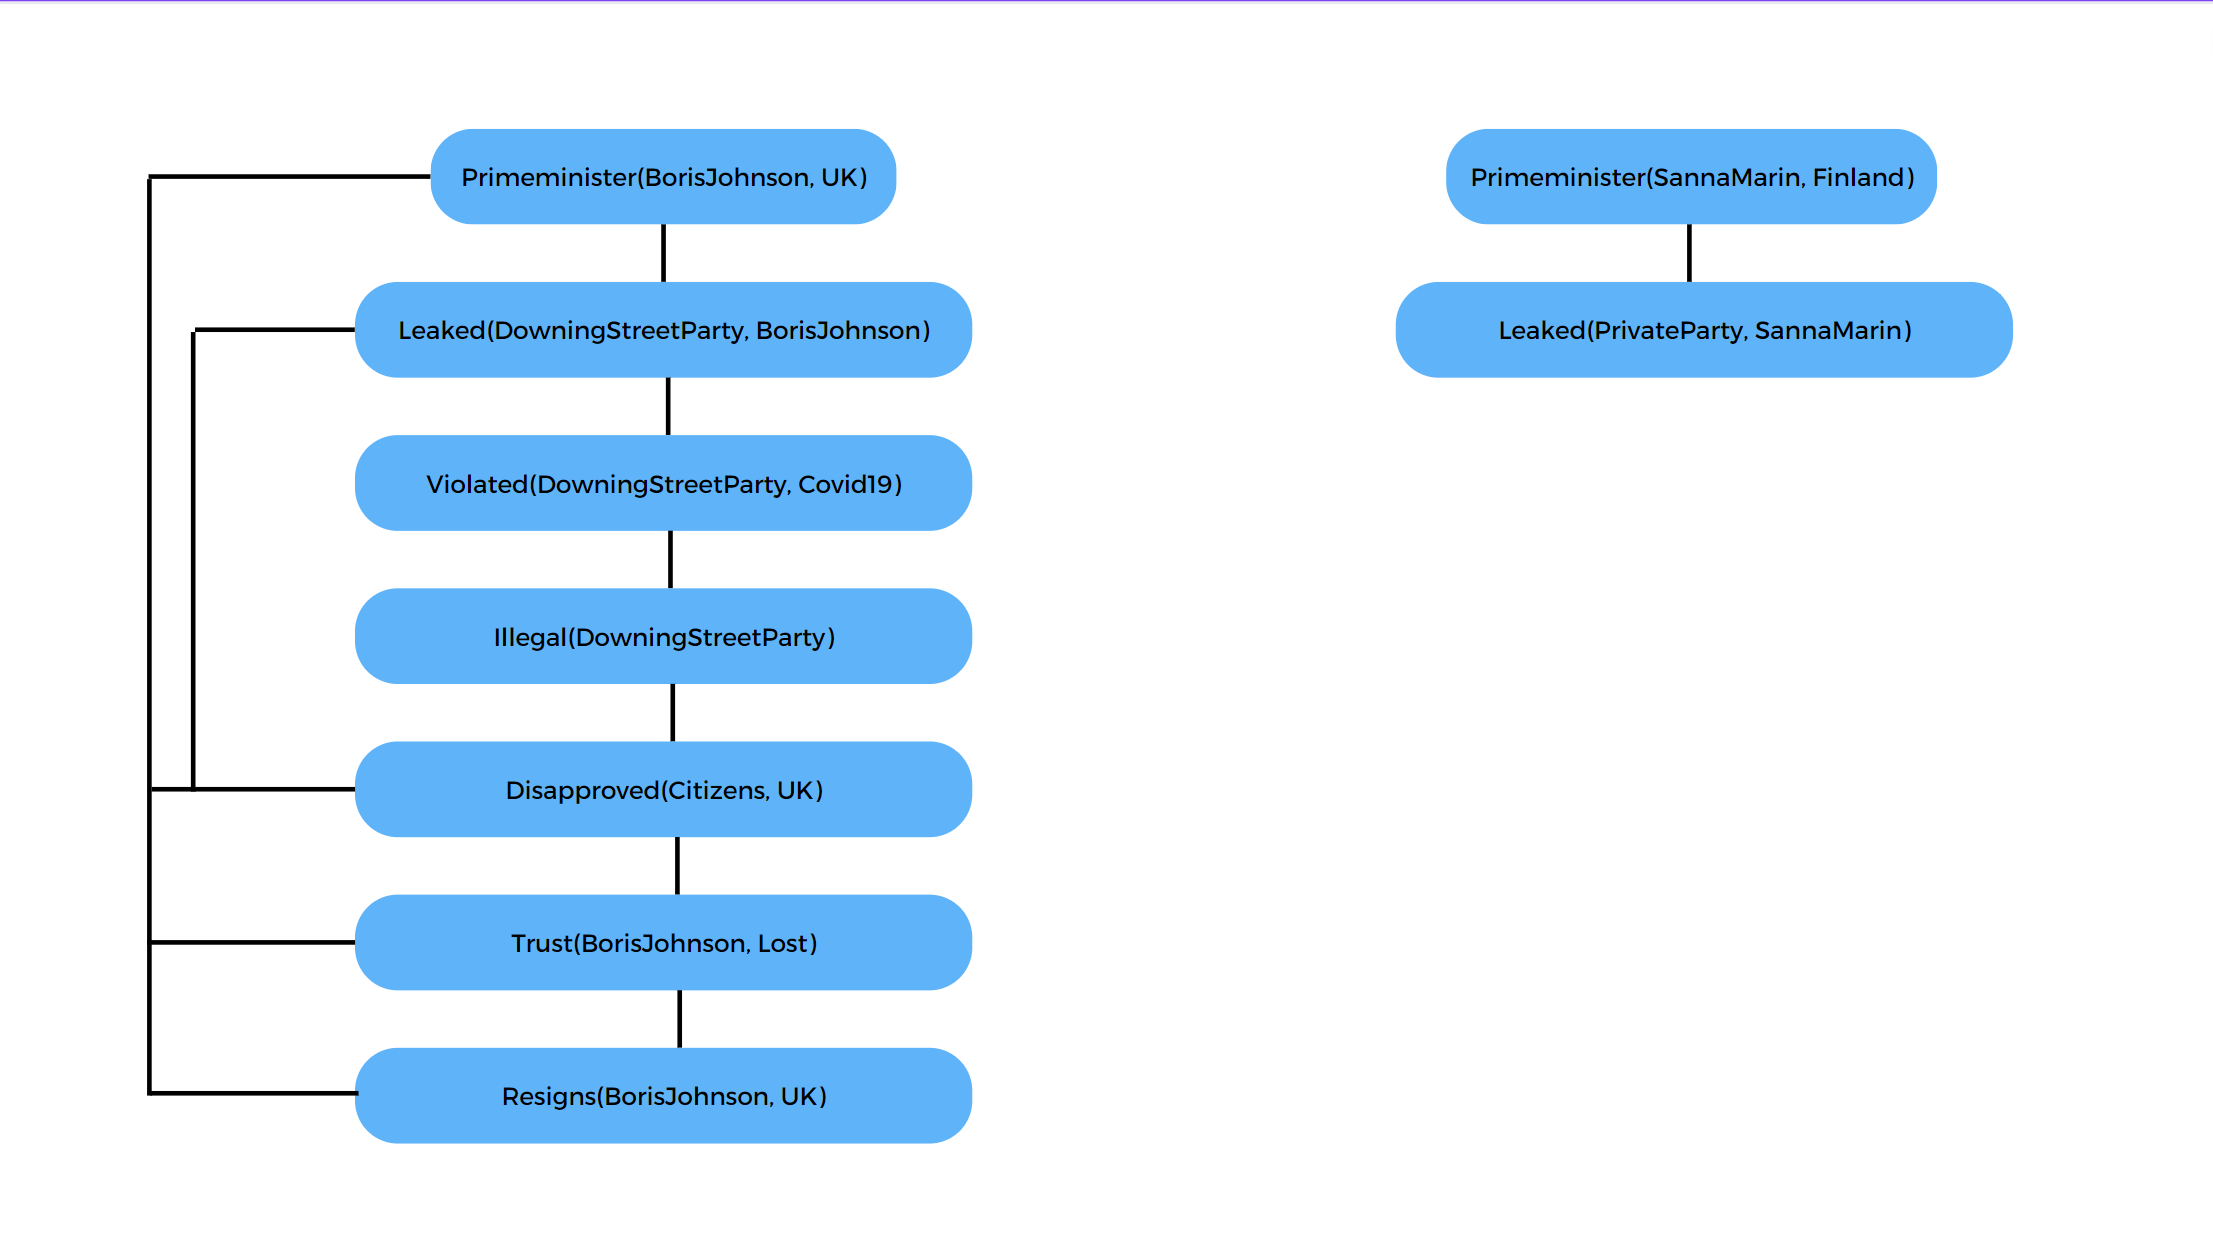